In [9]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

*Binary Classification*

In [78]:
# load IMDB data and vectorize only top 10,000 most frequently occurring words

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [79]:
train_data.shape

(25000,)

In [80]:
# 0 denotes negative reviews & 1 denotes positive reviews
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [81]:
# dictionary mapping word to numbers
word_index = imdb.get_word_index()

In [82]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [83]:
# print the english version on a sample review. The original dataset is offset by 3 values
# because 0, 1, and 2 are reserved indices for padding, start of sequence, and unknown.

for word in train_data[2]:
    print(reverse_word_index.get(word - 3, "?"), end = " ")

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life 

In [84]:
for review in train_data[:5]:
    print(len(review))

218
189
141
550
147


In [7]:
# multi-hot encode the reviews and make their length similar

def encode_data(data):
    encoded_data = np.zeros(shape=(len(data), 10000), dtype=np.float32)

    for index, sentence in enumerate(data):
        for word in sentence:
            encoded_data[index, word] = 1

    return encoded_data

In [86]:
train_data = encode_data(train_data)
test_data = encode_data(test_data)

In [87]:
train_labels.dtype

dtype('int64')

In [88]:
train_labels = np.asarray(train_labels).astype("float32")
test_labels = np.asarray(test_labels).astype("float32")

In [89]:
# build and compile the model

model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [90]:
# binary cross-entropy measure the difference between 2 probability distributions
# and hence it is the best loss function for binary classification

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [91]:
# generate a validation set from the training data

val_data = train_data[:5000]
partial_train_data = train_data[5000:]
val_labels = train_labels[:5000]
partial_train_labels = train_labels[5000:]

In [92]:
history = model.fit(partial_train_data,partial_train_labels,
 epochs=20,
 batch_size=512,
 validation_data=(val_data, val_labels))

Epoch 1/20
40/40 [==============================] - 4s 64ms/step - loss: 0.4772 - accuracy: 0.7958 - val_loss: 0.3614 - val_accuracy: 0.8672
Epoch 2/20
40/40 [==============================] - 1s 29ms/step - loss: 0.2809 - accuracy: 0.9007 - val_loss: 0.2829 - val_accuracy: 0.8882
Epoch 3/20
40/40 [==============================] - 1s 32ms/step - loss: 0.2155 - accuracy: 0.9236 - val_loss: 0.2994 - val_accuracy: 0.8822
Epoch 4/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1786 - accuracy: 0.9370 - val_loss: 0.2704 - val_accuracy: 0.8934
Epoch 5/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1520 - accuracy: 0.9473 - val_loss: 0.2843 - val_accuracy: 0.8898
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1304 - accuracy: 0.9559 - val_loss: 0.3854 - val_accuracy: 0.8692
Epoch 7/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1152 - accuracy: 0.9600 - val_loss: 0.3147 - val_accuracy: 0.8880
Epoch 8/20
40

In [93]:
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

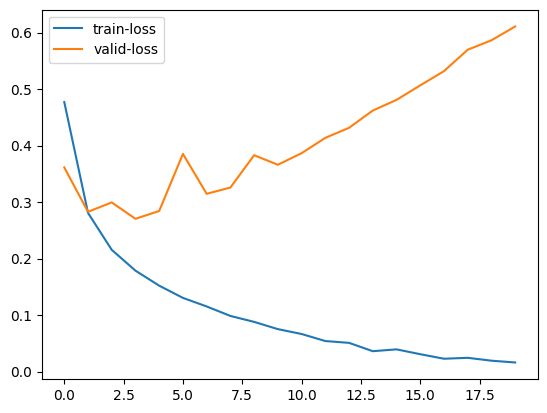

In [94]:
plt.plot(range(20),training_loss, label = "train-loss")
plt.plot(range(20),validation_loss, label = "valid-loss")
plt.legend()
plt.show()

In [95]:
# evaluate the model on test data using the evaluate() method

model.evaluate(test_data, test_labels)

782/782 [==============================] - 2s 3ms/step - loss: 0.6646 - accuracy: 0.8568


[0.6645960807800293, 0.8568000197410583]

In [96]:
# build and compile a better model by reducing the training epochs
# until the point where overfitting seems to start (approximately at epoch 5)

model2 = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model2.fit(partial_train_data,partial_train_labels,
 epochs=5,
 batch_size=512,
 validation_data=(val_data, val_labels))

Epoch 1/5
40/40 [==============================] - 2s 39ms/step - loss: 0.5084 - accuracy: 0.7969 - val_loss: 0.3919 - val_accuracy: 0.8602
Epoch 2/5
40/40 [==============================] - 1s 28ms/step - loss: 0.3059 - accuracy: 0.8989 - val_loss: 0.2964 - val_accuracy: 0.8844
Epoch 3/5
40/40 [==============================] - 1s 29ms/step - loss: 0.2340 - accuracy: 0.9189 - val_loss: 0.2846 - val_accuracy: 0.8836
Epoch 4/5
40/40 [==============================] - 1s 29ms/step - loss: 0.1949 - accuracy: 0.9325 - val_loss: 0.2686 - val_accuracy: 0.8924
Epoch 5/5
40/40 [==============================] - 1s 29ms/step - loss: 0.1670 - accuracy: 0.9425 - val_loss: 0.2738 - val_accuracy: 0.8904


**The Most important question!**

**WHY** this sort of an approach works?

How does a multi-hot encoded sequence passed into a simple neural network relate to the sentiment of the sentence?

Ans:

Probably because, the network learns the relationships between word presence/absence and sentiment. For instance, the network might learn that the presence of words like "love" or "fantastic" is associated with positive sentiment, while words like "worst" or "horrible" are associated with negative sentiment.

In [155]:
# let's try with a tricky example

review = ["movie", "is", "also", "light", "and", "very", "old", "story"] #, "they", "did", "make", "a", "bad", "film"]

In [156]:
vector = [word_index[word] for word in review]
vector = np.expand_dims(vector, axis = 0)
vector = encode_data(vector)

In [157]:
vector

array([[0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [158]:
model2.predict(vector)

1/1 [==============================] - 0s 23ms/step


array([[0.57193756]], dtype=float32)

*Multi-class Classification*

In [2]:
# import dataset

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
train_labels[34]

1

In [4]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [5]:
# show a sample sentence from the dataset

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for word in train_data[25]:
    print(reverse_word_index.get(word - 3, "?"), end = " ")

? there were 106 200 tonnes of u s corn shipped to the soviet union in the week ended march 26 according to the u s agriculture department's latest export sales report there were no wheat or soybean shipments during the week the ussr has purchased 2 65 mln tonnes of u s corn as of march 26 for delivery in the fourth year of the u s ussr grain agreement total shipments in the third year of the u s ussr grains agreement which ended september 30 amounted to 152 600 tonnes of wheat 6 808 100 tonnes of corn and 1 518 700 tonnes of soybeans reuter 3 

In [10]:
# encode input sequences into multi-hot encodings of equal length

train_data = encode_data(train_data)
test_data = encode_data(test_data)

In [11]:
# convert the labels into one-hot encoding format

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
len(train_labels[0])

46

In [15]:
# build the model

model = keras.Sequential([
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(46, activation="softmax")])

In [16]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
# generate a validation set from the training data

val_data = train_data[:1000]
partial_train_data = train_data[1000:]
val_labels = train_labels[:1000]
partial_train_labels = train_labels[1000:]

In [18]:
# model training

history = model.fit(partial_train_data,
partial_train_labels,
epochs=20,
batch_size=512,
validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.8190 - accuracy: 0.5200 - val_loss: 1.8540 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.5401 - accuracy: 0.6840 - val_loss: 1.3712 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1658 - accuracy: 0.7479 - val_loss: 1.1711 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 0.9439 - accuracy: 0.8024 - val_loss: 1.0665 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.7836 - accuracy: 0.8349 - val_loss: 0.9883 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6548 - accuracy: 0.8601 - val_loss: 0.9298 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 74ms/step - loss: 0.5505 - accuracy: 0.8796 - val_loss: 0.9022 - val_accuracy: 0.8110
Epoch 8/20
16

In [19]:
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

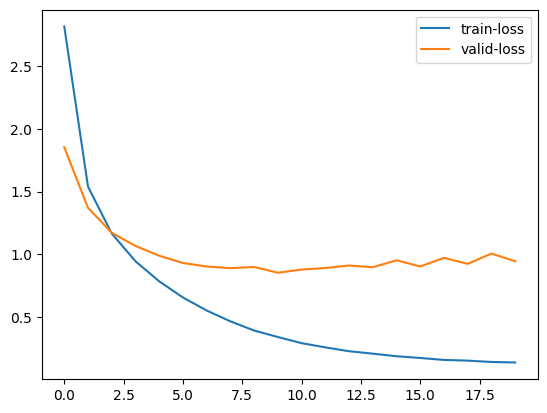

In [20]:
# training loss vs validation loss

plt.plot(range(20),training_loss, label = "train-loss")
plt.plot(range(20),validation_loss, label = "valid-loss")
plt.legend()
plt.show()

In [21]:
# evaluate the model on test data using the evaluate() method

model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.0695 - accuracy: 0.7903


[1.069498896598816, 0.7902938723564148]

In [22]:
# build and compile a better model by reducing the training epochs
# until the point where overfitting seems to start (approximately at epoch 9)

model3 = keras.Sequential([
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(46, activation="softmax")])

model3.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model3.fit(partial_train_data,partial_train_labels,
 epochs= 9,
 batch_size=512,
 validation_data=(val_data, val_labels))

Epoch 1/9
16/16 [==============================] - 2s 79ms/step - loss: 2.7434 - accuracy: 0.4719 - val_loss: 1.8288 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 1s 86ms/step - loss: 1.5210 - accuracy: 0.6914 - val_loss: 1.3546 - val_accuracy: 0.6990
Epoch 3/9
16/16 [==============================] - 1s 87ms/step - loss: 1.1520 - accuracy: 0.7547 - val_loss: 1.1741 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 1s 63ms/step - loss: 0.9413 - accuracy: 0.7989 - val_loss: 1.0696 - val_accuracy: 0.7590
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.7784 - accuracy: 0.8348 - val_loss: 0.9988 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6523 - accuracy: 0.8649 - val_loss: 0.9527 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5477 - accuracy: 0.8861 - val_loss: 0.9286 - val_accuracy: 0.7950
Epoch 8/9
16/16 [===

Further in this series, various methods to prevent overfitting will be discussed

In [ ]:
# reference taken from the book: Deep Learning in Python with Fracois Chollet 2nd ed.